**DATA ANALYSIS AND VISUALIZATION PROJECT**

*Analysing Pima Indians Diabetes Dataset*

---



Aashi - 10812

Bhoomika - 10834

Dhavni -10843


---



***Importing Necessary Python Libraries***

In [18]:
import pandas as pd                 # for working with dataframe
import numpy as np                  # for numerical calculations
import matplotlib.pyplot as plt     # for creating plots
import seaborn as sns               # for finding outliers and data visualization

***Uploading and Loading the Dataset***


In [19]:
url= 'https://raw.githubusercontent.com/dhwanimp3/data-analysis/main/diabetes.csv'      # github link for dataset
df = pd.read_csv(url)                                                                   # loading dataset as a dataframe

***Data Exploration***

In this section, we will  and get to know and try to understand our dataset by describing its attributes.

In [20]:
df.head()         # displaying top 5 records

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
df.shape        # total number of rows and columns

(768, 9)

In [22]:
df.columns      # names of all the columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
df.dtypes       #data types of the columns

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [24]:
df.info()           #summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
df.describe()             # descibes the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


***Data Cleaning***

  In our data we have minimum value 0 in certain columns where it is medically impossible, for example, BloodPressure cannot be zero. We also have outliers such Insulin being as high as 846. In this section, we will resolve null values, standardize data, check for duplicate values, remove anomalies and outliers.

*(a) Removing Duplicate Rows*

In [26]:
df = df.drop_duplicates()

*(b) Checking for null values and removing them if any.*

In [27]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There aren't any null values in any column.

*(c) Finding and replacing the missing values.*

In [28]:
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


For replacing the missing values, we take different approach for each according to their distribution.

Glucose and Blood Pressure columns are normally distributed so we can replace by by mean value. SkinThickness, Insulin, BMI have skewed distributions hence median is a better choice as it is less affected by outliers.

In [29]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())

In [30]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


*(d) Idenitfying and handling outliers*

<Axes: xlabel='DiabetesPedigreeFunction'>

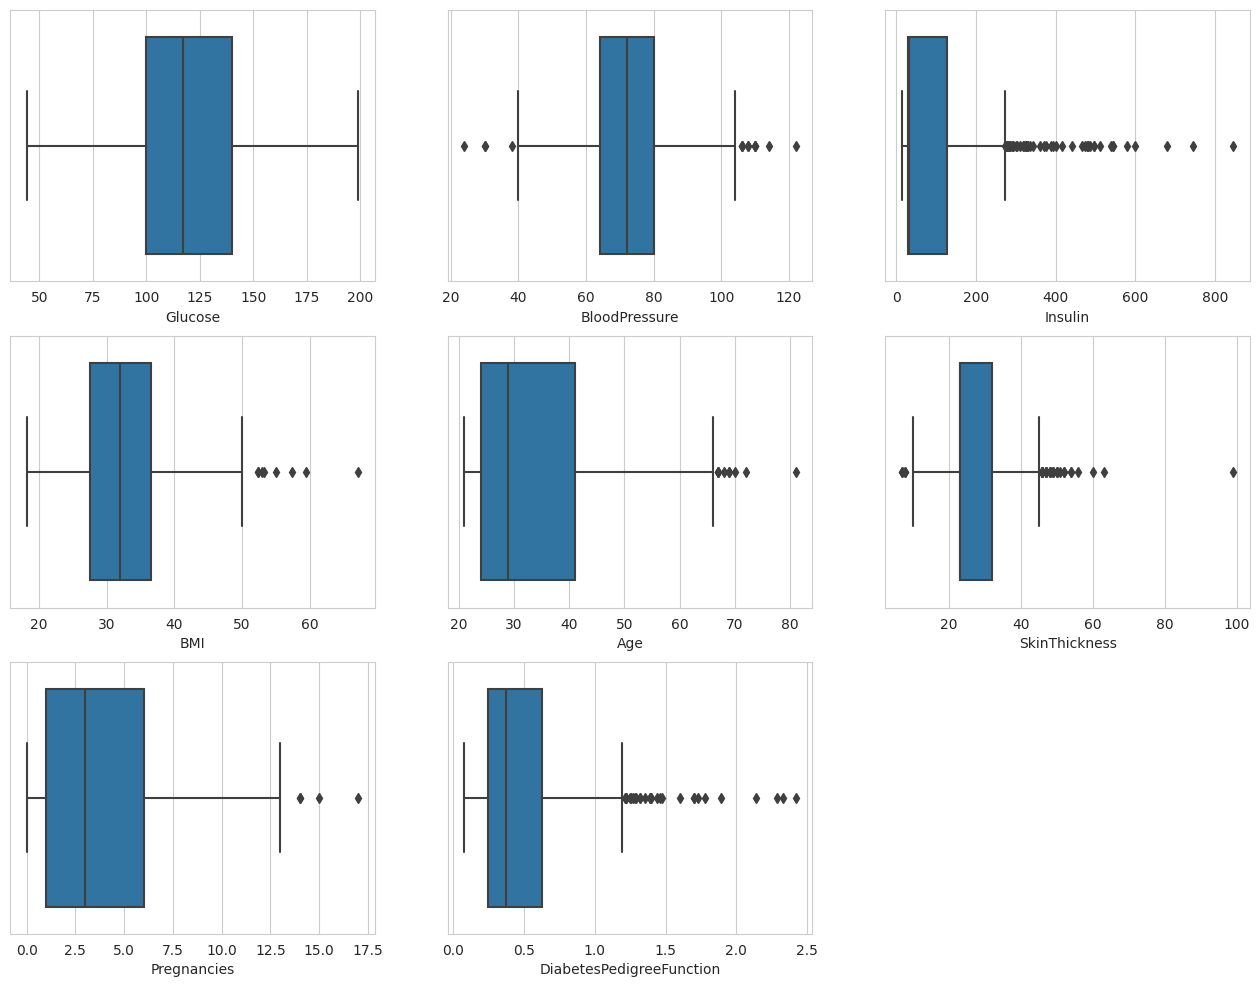

In [31]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose', data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure', data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin', data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI', data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age', data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness', data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies', data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction', data=df)

In [32]:
def remove_outliers(df, col):
   Q1 = df[col].quantile(0.25)
   Q3 = df[col].quantile(0.75)
   IQR = Q3 - Q1
   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR
   outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
   cleaned_df = df[~outliers]
   return (cleaned_df)

df=remove_outliers(df,'BMI')
df=remove_outliers(df,'Age')
df=remove_outliers(df,'Pregnancies')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27,30.5,36.8,0.340,27,0
765,5,121.0,72.0,23,112.0,26.2,0.245,30,0
766,1,126.0,60.0,23,30.5,30.1,0.349,47,1


***Data Visualization***

Plotting data using charts and plots to analyse it and draw conclusions.

<Axes: xlabel='Outcome', ylabel='count'>

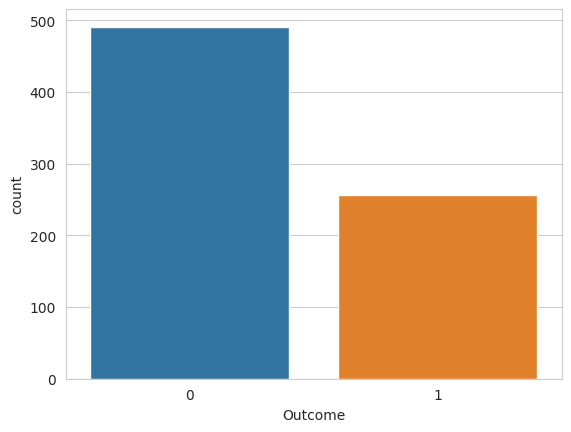

In [33]:
# count plot to see number of patients with and without diabetes

sns.countplot(x='Outcome',data=df)

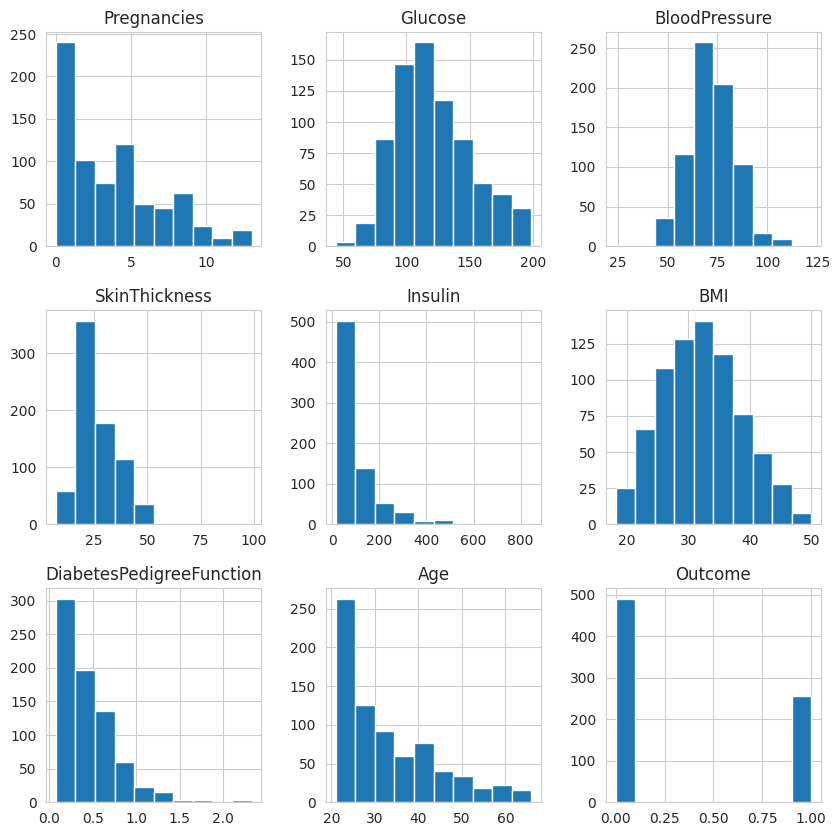

In [34]:
# historgram to see the distrbution of variables in the dataset

df.hist(bins=10,figsize=(10,10))
plt.show()

Glucose and BloodPressure are evenly distrubuted.
BMI becomes evenly distributed after removing outliers.
Rest of the columns are skewed.

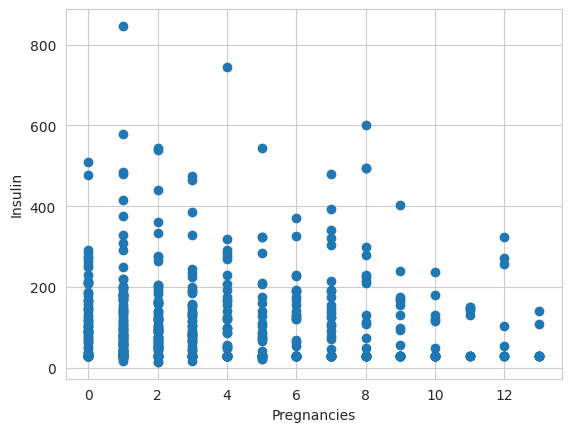

In [35]:
# scatter plot to find relationship between variables

plt.scatter(df['Pregnancies'], df['Insulin'])
plt.xlabel('Pregnancies')
plt.ylabel('Insulin')
plt.show()

Conclusion: women with higher number of pregnancies have lower insulin.

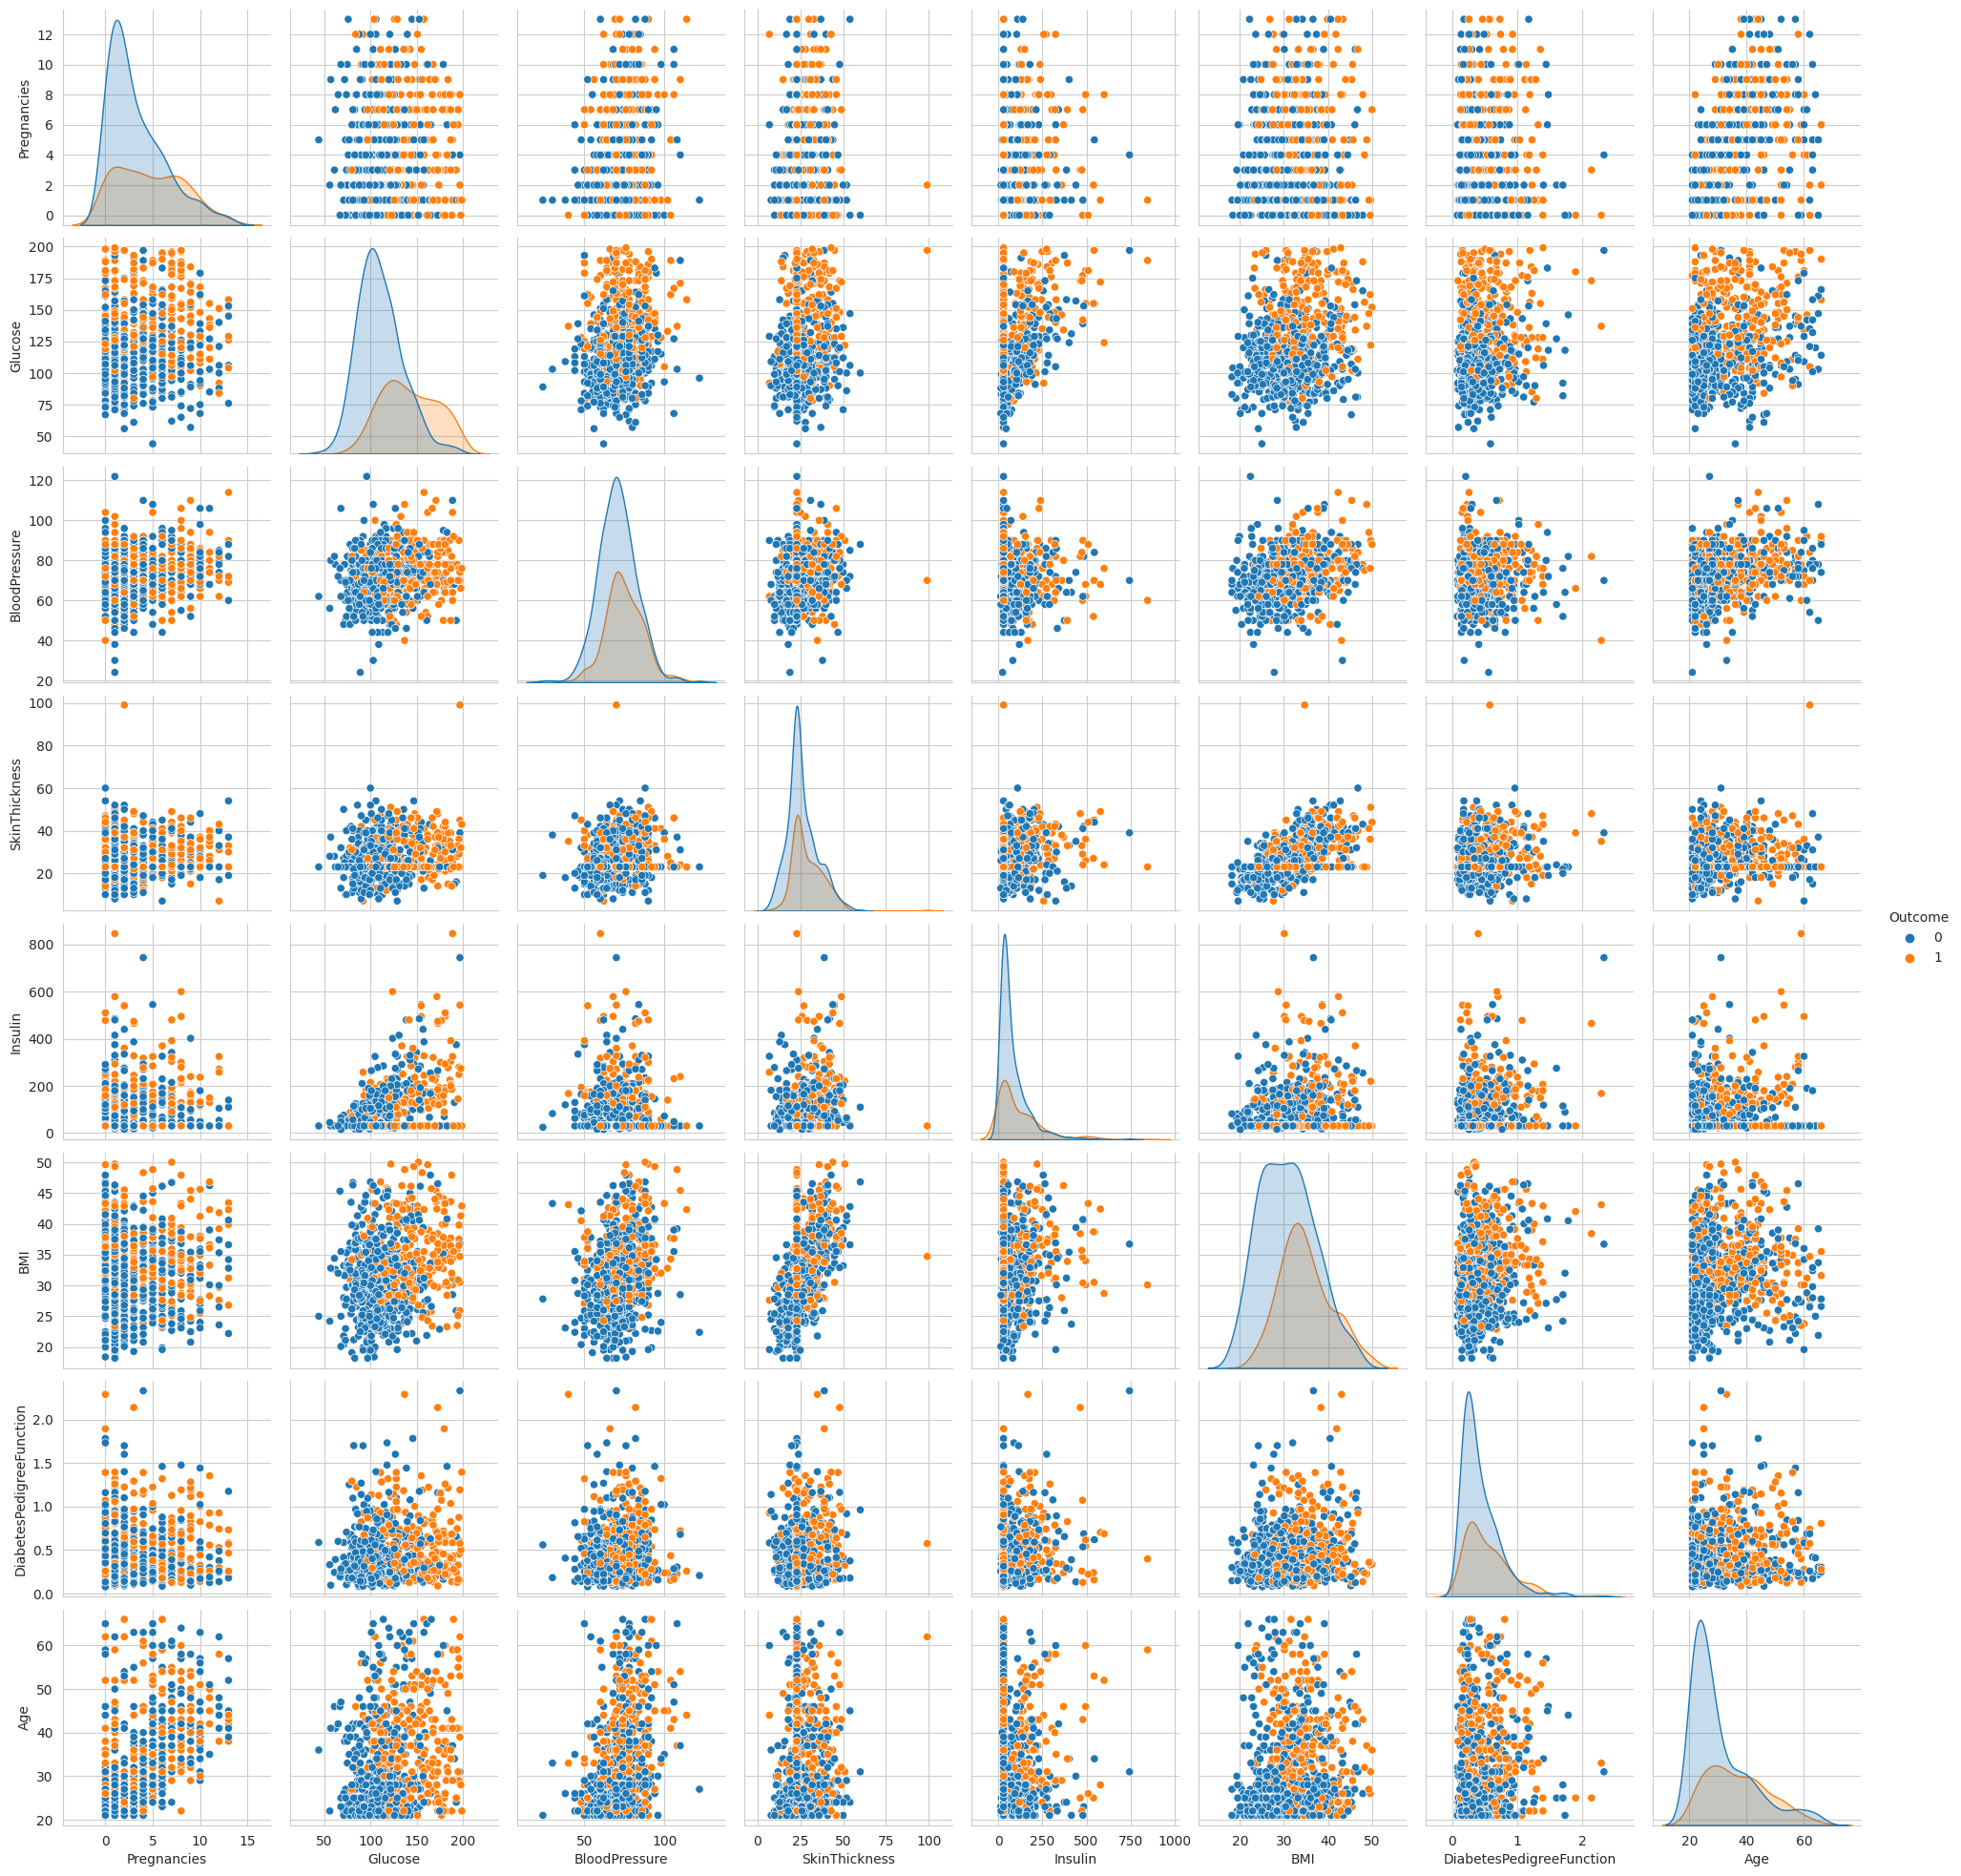

In [36]:
# pairplot for relationship between all the possible combination of variables

sns.pairplot(df, hue='Outcome')

<Axes: >

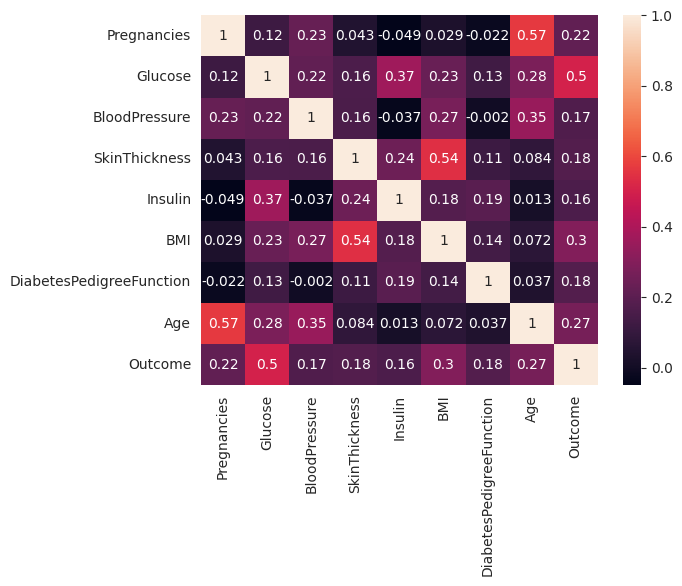

In [37]:
# heatmap to show correlation

corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

We can see that Outcome of diabetes has correlation with Glucose, BMI, Age and Pregnancies. It has weaker coorelation with other attributes.

***Data Analysis***

Categorizing, grouping and peforming functions on data to draw conclusions.

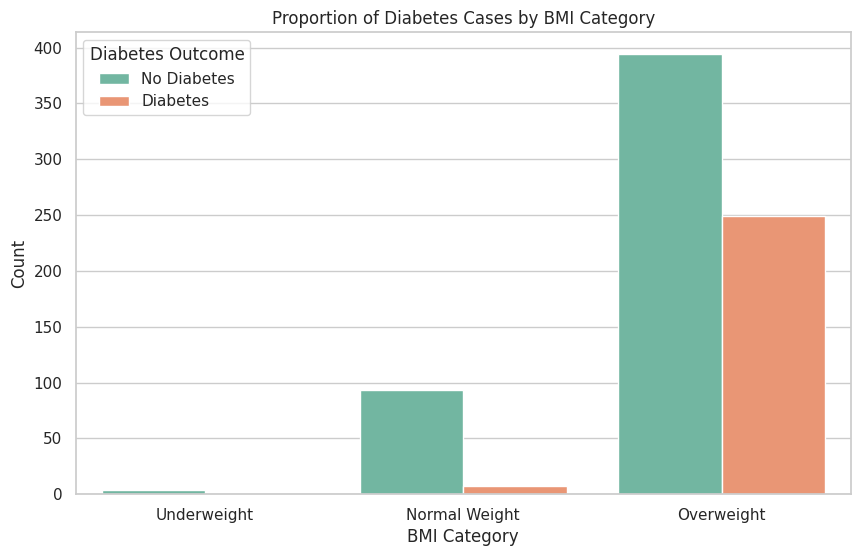

Ratio of Diabetic to All in Underweight: 0.00
Ratio of Diabetic to All in Normal Weight: 0.07
Ratio of Diabetic to All in Overweight: 0.39


In [38]:
# shows the proportion of diabetes cases in each BMI category

bins = [0, 18.5, 24.9, 100]
labels = ['Underweight', 'Normal Weight', 'Overweight']
df['BMI_Cat']= pd.cut(df['BMI'], bins=bins, labels=labels)
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='BMI_Cat', hue='Outcome', data=df, palette='Set2')
plt.legend(title='Diabetes Outcome', labels=['No Diabetes', 'Diabetes'])
plt.title('Proportion of Diabetes Cases by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

for cat in labels:
    total_people = len(df[df['BMI_Cat'] == cat])
    diabetic_people = len(df[(df['BMI_Cat'] == cat) & (df['Outcome'] == 1)])

    ratio = diabetic_people / total_people

    print(f'Ratio of Diabetic to All in {cat}: {ratio:.2f}')


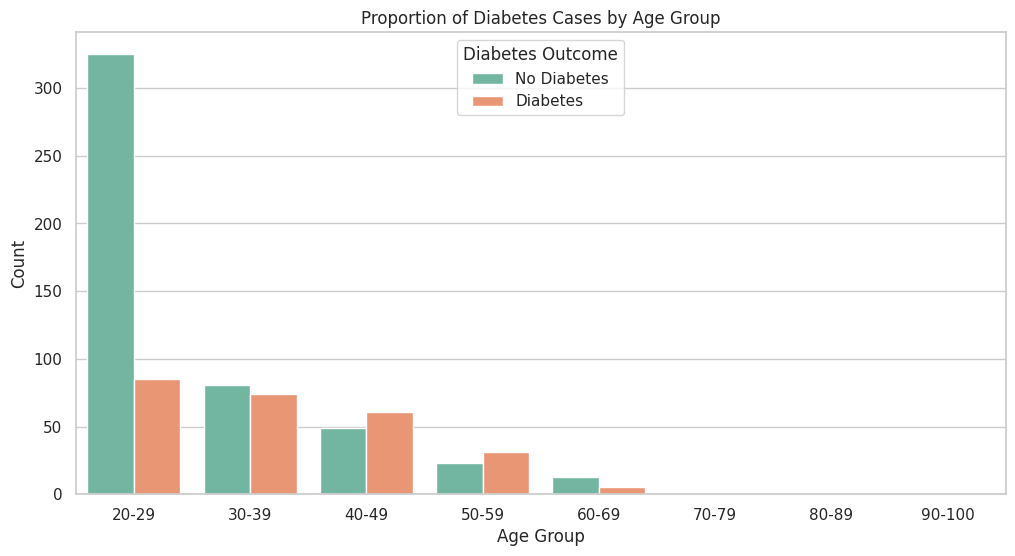

Ratio of Diabetic to All in 20-29: 0.21
Ratio of Diabetic to All in 30-39: 0.48
Ratio of Diabetic to All in 40-49: 0.55
Ratio of Diabetic to All in 50-59: 0.57
Ratio of Diabetic to All in 60-69: 0.28
Ratio of Diabetic to All in 70-79: 0.00
Ratio of Diabetic to All in 80-89: 0.00
Ratio of Diabetic to All in 90-100: 0.00


In [39]:
# categorizing and visualizing diabetes outcome in different age groups

bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(x='Age_Group', hue='Outcome', data= df, palette='Set2')
plt.legend(title='Diabetes Outcome', labels=['No Diabetes', 'Diabetes'])
plt.title('Proportion of Diabetes Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

for grp in labels:
    total_people = len(df[df['Age_Group'] == grp])
    diabetic_people = len(df[(df['Age_Group'] == grp) & (df['Outcome'] == 1)])
    if(total_people!=0):
      ratio = diabetic_people / total_people
    else:
      ratio=0

    print(f'Ratio of Diabetic to All in {grp}: {ratio:.2f}')

As we can observe, the number of diabetes patients are more in the age group of 40-49 and 50-59 when compared to all the entries in these age groups. While women in the age group of 20-29 have lesser chances of diabities.

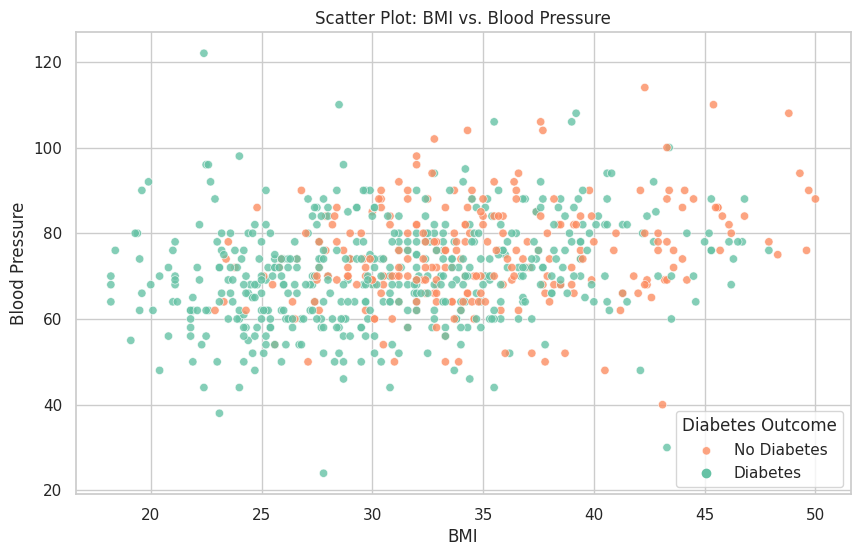

In [40]:
# shows BMI and Blood Pressure in relation with outcomes.

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='BloodPressure', data=df, hue='Outcome', palette='Set2', alpha=0.8)
plt.title('Scatter Plot: BMI vs. Blood Pressure')
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
plt.legend(title='Diabetes Outcome', labels=['No Diabetes', 'Diabetes'])
plt.show()

We can observe that the points for diabetic patients cluster under the blood pressure of range (68-80) and BMI of (25-30).


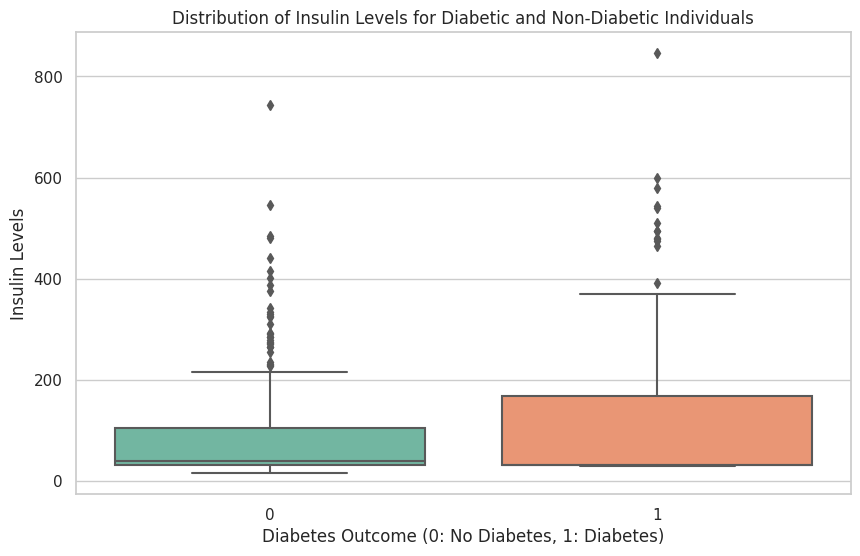

In [41]:
# shows distribution of insulin levels for diabetic an non-diabetic individuals

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Insulin', data=df, palette='Set2')
plt.title('Distribution of Insulin Levels for Diabetic and Non-Diabetic Individuals')
plt.xlabel('Diabetes Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Insulin Levels')
plt.show()